## Grundlæggende eksempler på Pandas

Denne notebook vil guide dig gennem nogle helt grundlæggende Pandas-koncepter. Vi starter med at importere typiske datavidenskabsbiblioteker:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Serier

Serier er som en liste eller en 1D-array, men med indeks. Alle operationer er indeks-justerede.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


En af de hyppige anvendelser af serier er **tidsserier**. I tidsserier har indekset en særlig struktur - typisk et interval af datoer eller tidspunkter. Vi kan oprette et sådant indeks med `pd.date_range`.

Antag, at vi har en serie, der viser mængden af produkt, der købes hver dag, og vi ved, at vi hver søndag også skal tage én vare til os selv. Her er, hvordan man kan modellere det ved hjælp af serier:


Length of index is 366


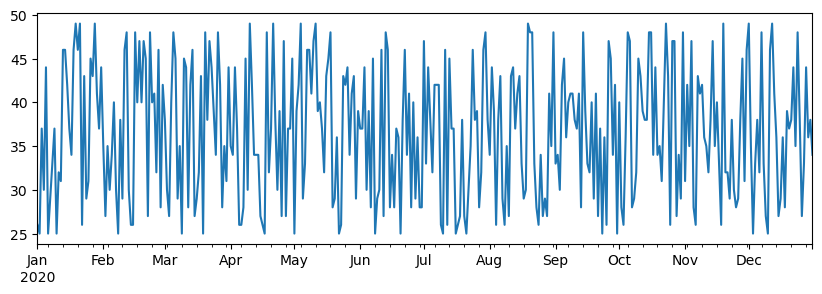

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Som du kan se, har vi problemer her, fordi i den ugentlige serie betragtes ikke-omtalte dage som manglende (`NaN`), og at tilføje `NaN` til et tal giver os `NaN`. For at få det korrekte resultat, skal vi angive `fill_value`, når vi lægger serier sammen:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


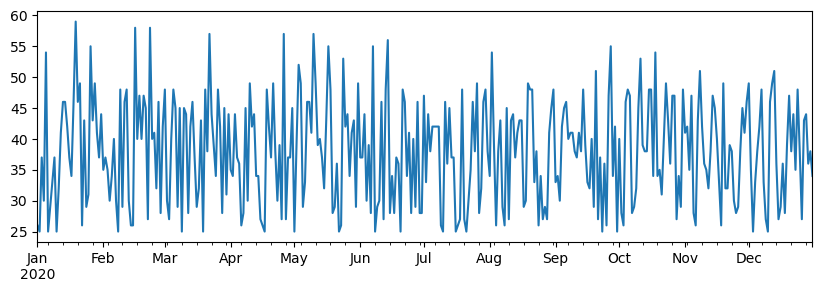

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

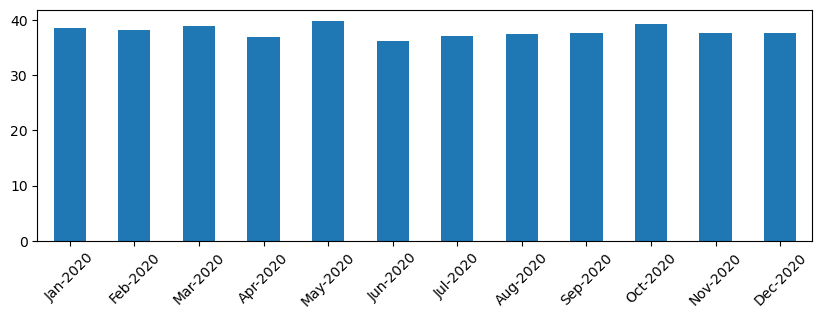

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

En dataframe er i bund og grund en samling af serier med samme indeks. Vi kan kombinere flere serier sammen til en dataframe. Givet `a` og `b` serierne defineret ovenfor:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Vi kan også bruge Series som kolonner og angive kolonnenavne ved hjælp af ordbog:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Det samme resultat kan opnås ved at transponere (og derefter omdøbe kolonnerne, så de matcher det tidligere eksempel):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Valg af kolonner** fra DataFrame kan gøres sådan:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Valg af rækker** baseret på filterudtryk:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Den måde, det fungerer på, er, at udtrykket `df['A']<5` returnerer en boolesk serie, som angiver, om udtrykket er `True` eller `False` for hvert element i serien. Når serien bruges som indeks, returnerer den et delmængde af rækkerne i DataFrame. Derfor er det ikke muligt at bruge vilkårlige Python-booleske udtryk, for eksempel ville det være forkert at skrive `df[df['A']>5 and df['A']<7]`. I stedet bør du bruge den specielle `&`-operation på booleske serier:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**Oprettelse af nye beregnelige kolonner**. Vi kan nemt oprette nye beregnelige kolonner til vores DataFrame ved at bruge intuitive udtryk. Koden nedenfor beregner afvigelsen af A fra dens gennemsnitsværdi.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Hvad der faktisk sker, er, at vi beregner en serie og derefter tildeler denne serie til venstre side, hvilket skaber en anden kolonne.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Valg af rækker baseret på tal** kan gøres ved hjælp af `iloc` konstruktionen. For eksempel, for at vælge de første 5 rækker fra DataFrame:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Gruppering** bruges ofte til at opnå et resultat, der ligner *pivot-tabeller* i Excel. Antag, at vi ønsker at beregne middelværdien af kolonnen `A` for hver given værdi af `LenB`. Så kan vi gruppere vores DataFrame efter `LenB` og kalde `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Hvis vi skal beregne gennemsnit og antallet af elementer i gruppen, kan vi bruge en mere kompleks `aggregate`-funktion:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Udskrivning og Plotning

Dataforskere skal ofte udforske data, og derfor er det vigtigt at kunne visualisere dem. Når en DataFrame er stor, ønsker vi ofte blot at sikre os, at vi gør alting korrekt, ved at udskrive de første par rækker. Dette kan gøres ved at kalde `df.head()`. Hvis du kører det fra Jupyter Notebook, vil det udskrive DataFrame i en pæn tabelform.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Vi har også set brugen af funktionen `plot` til at visualisere nogle kolonner. Selvom `plot` er meget nyttig til mange opgaver og understøtter mange forskellige graf-typer via parameteren `kind=`, kan du altid bruge det rå `matplotlib`-bibliotek til at plotte noget mere komplekst. Vi vil dække datavisualisering i detaljer i separate kursuslektioner.


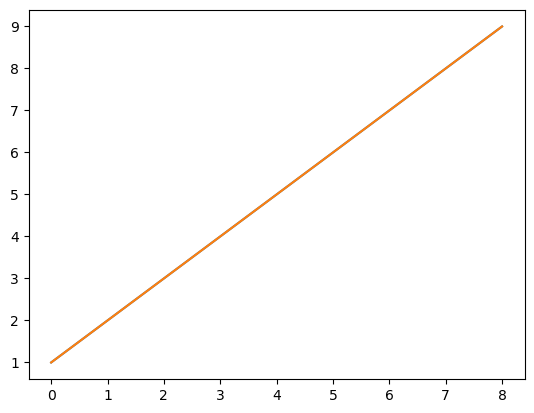

In [61]:
df['A'].plot()
plt.show()

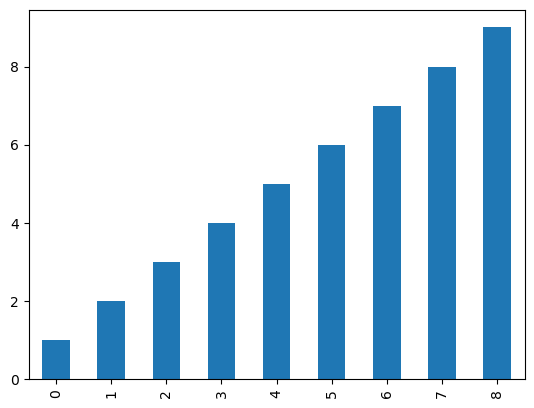

In [63]:
df['A'].plot(kind='bar')
plt.show()

Denne oversigt dækker de vigtigste begreber i Pandas, men biblioteket er meget omfattende, og der er ingen grænser for, hvad du kan gøre med det! Lad os nu anvende denne viden til at løse et specifikt problem.



---

**Ansvarsfraskrivelse**:  
Dette dokument er blevet oversat ved hjælp af AI-oversættelsestjenesten [Co-op Translator](https://github.com/Azure/co-op-translator). Selvom vi bestræber os på nøjagtighed, skal du være opmærksom på, at automatiserede oversættelser kan indeholde fejl eller unøjagtigheder. Det originale dokument på dets oprindelige sprog bør betragtes som den autoritative kilde. For kritisk information anbefales professionel menneskelig oversættelse. Vi er ikke ansvarlige for eventuelle misforståelser eller fejltolkninger, der opstår som følge af brugen af denne oversættelse.
